# Import Library

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [ ]:
#卷積層1

In [8]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [9]:
model.add(Dropout(rate=0.25))

In [10]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
#卷積層2與池化層2

In [11]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [12]:
model.add(Dropout(0.25))

In [13]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [14]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [15]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [16]:
model.add(Dense(10, activation='softmax'))

In [17]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [18]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

# 作業: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate

In [19]:
from keras import losses

In [20]:
# categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [21]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)     

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 97s 2ms/step - loss: 1.8121 - acc: 0.3439 - val_loss: 1.6135 - val_acc: 0.4579
Epoch 2/10
40000/40000 [==============================] - 88s 2ms/step - loss: 1.4471 - acc: 0.4799 - val_loss: 1.3834 - val_acc: 0.5376
Epoch 3/10
40000/40000 [==============================] - 88s 2ms/step - loss: 1.2952 - acc: 0.5371 - val_loss: 1.3035 - val_acc: 0.5818
Epoch 4/10
40000/40000 [==============================] - 88s 2ms/step - loss: 1.1888 - acc: 0.5798 - val_loss: 1.2185 - val_acc: 0.6119
Epoch 5/10
40000/40000 [==============================] - 88s 2ms/step - loss: 1.1021 - acc: 0.6085 - val_loss: 1.1487 - val_acc: 0.6316
Epoch 6/10
40000/40000 [==============================] - 88s 2ms/step - loss: 1.0335 - acc: 0.6341 - val_loss: 1.1019 - val_acc: 0.6338
Epoch 7/10
40000/40000 [==============================] - 88s 2ms/step - loss: 0.9717 - acc: 0.6563 - val_loss: 1.0541 - val_acc

In [22]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

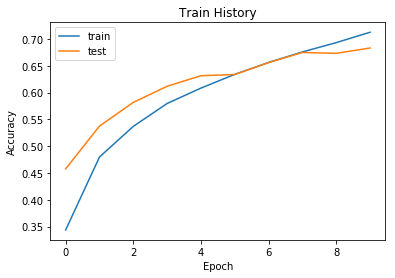

In [23]:
show_train_history('acc','val_acc')

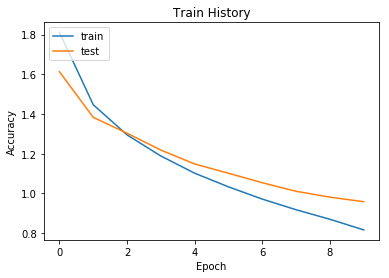

In [24]:
show_train_history('loss','val_loss')

In [25]:
# mean_squared_error
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [26]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1) 

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 89s 2ms/step - loss: 0.0352 - acc: 0.7465 - val_loss: 0.0419 - val_acc: 0.7088
Epoch 2/10
40000/40000 [==============================] - 88s 2ms/step - loss: 0.0344 - acc: 0.7544 - val_loss: 0.0417 - val_acc: 0.7098
Epoch 3/10
40000/40000 [==============================] - 88s 2ms/step - loss: 0.0341 - acc: 0.7570 - val_loss: 0.0413 - val_acc: 0.7110
Epoch 4/10
40000/40000 [==============================] - 87s 2ms/step - loss: 0.0335 - acc: 0.7614 - val_loss: 0.0411 - val_acc: 0.7132
Epoch 5/10
40000/40000 [==============================] - 87s 2ms/step - loss: 0.0332 - acc: 0.7620 - val_loss: 0.0407 - val_acc: 0.7160
Epoch 6/10
40000/40000 [==============================] - 87s 2ms/step - loss: 0.0328 - acc: 0.7653 - val_loss: 0.0408 - val_acc: 0.7127
Epoch 7/10
40000/40000 [==============================] - 87s 2ms/step - loss: 0.0326 - acc: 0.7681 - val_loss: 0.0405 - val_acc

In [27]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

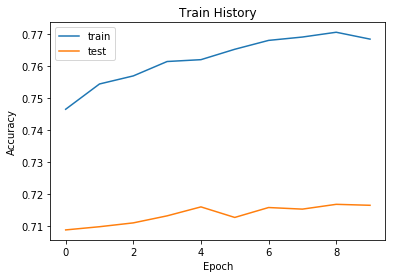

In [28]:
show_train_history('acc','val_acc')

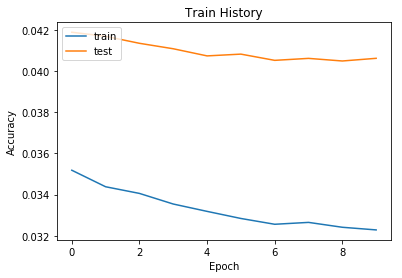

In [29]:
show_train_history('loss','val_loss')

In [30]:
# binary_crossentropy
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [31]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1) 

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 90s 2ms/step - loss: 0.1110 - acc: 0.9567 - val_loss: 0.1390 - val_acc: 0.9465
Epoch 2/10
40000/40000 [==============================] - 88s 2ms/step - loss: 0.1105 - acc: 0.9566 - val_loss: 0.1376 - val_acc: 0.9471
Epoch 3/10
40000/40000 [==============================] - 88s 2ms/step - loss: 0.1085 - acc: 0.9578 - val_loss: 0.1388 - val_acc: 0.9470
Epoch 4/10
40000/40000 [==============================] - 89s 2ms/step - loss: 0.1071 - acc: 0.9581 - val_loss: 0.1365 - val_acc: 0.9477
Epoch 5/10
40000/40000 [==============================] - 88s 2ms/step - loss: 0.1060 - acc: 0.9589 - val_loss: 0.1353 - val_acc: 0.9482
Epoch 6/10
40000/40000 [==============================] - 89s 2ms/step - loss: 0.1042 - acc: 0.9595 - val_loss: 0.1358 - val_acc: 0.9481
Epoch 7/10
40000/40000 [==============================] - 89s 2ms/step - loss: 0.1029 - acc: 0.9602 - val_loss: 0.1341 - val_acc

In [32]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

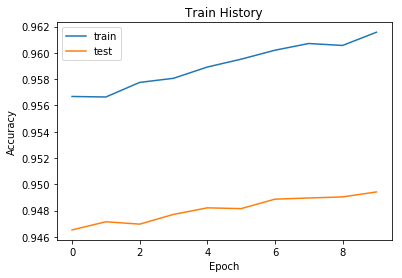

In [33]:
show_train_history('acc','val_acc')

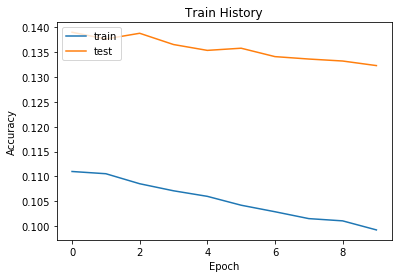

In [34]:
show_train_history('loss','val_loss')